In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\이창모\Desktop\대학생활\3-2\carrot_popular_sales.csv",
               engine='python',encoding='cp949')

In [4]:
df

,manner_temperature,chatting,interest
0,36.5,52,14
1,37.1,25,15
2,45.4,11,2
3,40.2,25,11
4,37.0,29,6
...,...,...,...
91,45.6,11,8
92,42.6,3,3
93,50.7,11,2
94,36.4,4,4


In [5]:
x_data=df.iloc[:,[0]].values  #manner_temperature
y1_data=df.iloc[:,[1]].values #chatting
y2_data=df.iloc[:,[2]].values #interest

In [6]:
print(x_data.shape)

(96, 1)


In [7]:
x_data = np.array(x_data, np.float32)
y1_data = np.array(y1_data, np.float32)
y2_data = np.array(y2_data, np.float32)

In [8]:
print(x_data.shape)
print(y1_data.shape)
print(y2_data.shape)

(96, 1)
(96, 1)
(96, 1)


In [10]:
tf.random.set_seed(2000)

W1=tf.Variable(tf.random.normal([1, 1], mean=0.0))
b1=tf.Variable(tf.random.normal([1], mean=0.0))
W2=tf.Variable(tf.random.normal([1,1], mean = 0.0))
b2=tf.Variable(tf.random.normal([1], mean = 0.0))

In [11]:
def hypothesis1(x):
    return tf.matmul(x, W1) + b1

def hypothesis2(x):
    return tf.matmul(x, W2) + b2

def cost(hypo, y):
    return tf.reduce_mean(tf.square(hypo-y))

In [12]:
optimizer=tf.optimizers.SGD(learning_rate=0.00001)

In [18]:
for step in range(100001):  #10만번 진행
    #regression with chatting
    with tf.GradientTape() as g:
        pred1=hypothesis1(x_data)
        co1=cost(pred1, y1_data)
     
        gradients1=g.gradient(co1, [W1,b1])
   
    optimizer.apply_gradients(zip(gradients1, [W1,b1]))

    if step % 10000 == 0:
        print("cost1: \t", co1.numpy())
        print("W1: \t", W1.numpy())
        print("b1: \t", b1.numpy())
        print("\n")
        
    #regression with interest
    with tf.GradientTape() as g:             
        pred2=hypothesis2(x_data)
        co2=cost(pred2, y2_data)
        
        gradients2=g.gradient(co2, [W2,b2])
        
    optimizer.apply_gradients(zip(gradients2, [W2,b2]))
        
    if step % 10000 == 0:
        print("cost2: \t", co2.numpy())
        print("W2: \t", W2.numpy())
        print("b2: \t", b2.numpy())
        print("\n")

cost1: 	 649.45215
W1: 	 [[-0.28476083]]
b1: 	 [-0.47846982]


cost2: 	 1580.4491
W2: 	 [[-0.8318338]]
b2: 	 [0.36785746]


cost1: 	 61.78424
W1: 	 [[0.3054771]]
b1: 	 [-0.37064534]


cost2: 	 22.894974
W2: 	 [[0.13187048]]
b2: 	 [0.43402874]


cost1: 	 61.698486
W1: 	 [[0.30316827]]
b1: 	 [-0.27808148]


cost2: 	 22.877375
W2: 	 [[0.1308237]]
b2: 	 [0.47597662]


cost1: 	 61.613544
W1: 	 [[0.30086982]]
b1: 	 [-0.18593603]


cost2: 	 22.859955
W2: 	 [[0.12978297]]
b2: 	 [0.51769984]


cost1: 	 61.529446
W1: 	 [[0.298583]]
b1: 	 [-0.09425601]


cost2: 	 22.84263
W2: 	 [[0.12874271]]
b2: 	 [0.55940455]


cost1: 	 61.446156
W1: 	 [[0.2963073]]
b1: 	 [-0.00302198]


cost2: 	 22.825628
W2: 	 [[0.12771685]]
b2: 	 [0.60053176]


cost1: 	 61.363674
W1: 	 [[0.29404265]]
b1: 	 [0.08776934]


cost2: 	 22.808706
W2: 	 [[0.126691]]
b2: 	 [0.64165896]


cost1: 	 61.281994
W1: 	 [[0.29178914]]
b1: 	 [0.17811392]


cost2: 	 22.791883
W2: 	 [[0.125666]]
b2: 	 [0.6827519]


cost1: 	 61.20111
W1: 	 [[0.2

In [21]:
print(np.max(x_data))

83.8


(50,)
(50,)
(50,)


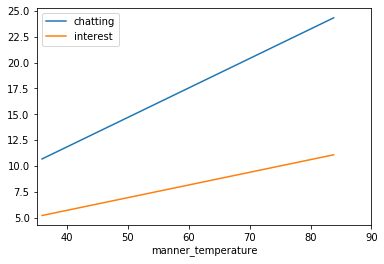

In [27]:
slope1 = W1.numpy()[0] #chatting의 기울기
slope2 = W2.numpy()[0] #interest의 기울기

xx=np.linspace(np.min(x_data), np.max(x_data))
yy1=xx*slope1 + b1.numpy()
yy2=xx*slope2 + b2.numpy()
print(xx.shape)
print(yy1.shape)
print(yy2.shape)


plt.plot(xx, yy1, label="chatting")
plt.plot(xx, yy2, label="interest")
plt.legend()
plt.xlim(35,90)
plt.xlabel("manner_temperature")
plt.show()

In [28]:
#결론: manner_temperature과 chatting의 상관관계가 더 크다